In [1]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

/tmp/ipykernel_33/272811689.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Malicioues Url classification Using ML features and Using BERT

## URLdecomposition

In [2]:
import numpy as np 
import pandas as pd 
import re
from urllib.parse import urlparse
import os.path

In [3]:
dataset = pd.read_csv("/kaggle/input/malicious-urls-dataset/malicious_phish.csv")

In [4]:
dataset.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [6]:
print("Dataset shape:", dataset.shape)

Dataset shape: (651191, 2)


In [7]:
dataset.keys()

Index(['url', 'type'], dtype='object')

In [8]:
dataset['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [9]:
dataset['url'].value_counts()

url
http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css                         180
http://www.pubyun.com/wiki/lib/exe/css.php?t=dokuwiki&tseed=f1f16e8c6142fab8553f2b9cfe045961    146
http://9779.info/%E6%A0%91%E5%8F%B6%E8%B4%B4%E7%94%BB%E4%BD%9C%E5%93%81/                         91
http://9779.info/%E6%A0%91%E5%8F%B6%E7%B2%98%E8%B4%B4%E7%94%BB/                                  88
http://www.js182.com/app/member/SportOption.php?uid=guest&langx=gb                               79
                                                                                               ... 
en.wikipedia.org/wiki/Montrealer                                                                  1
redbulgaria.com/                                                                                  1
news.ontario.ca/opo/en/2011/06/highway-417-expansion-moving-forward.html                          1
metal-archives.com/bands/Goddess_of_Desire/492                                                  

In [10]:
n_samples, n_features = dataset.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 651191
Number of features: 2


In [11]:
dataset.isnull().sum()

url     0
type    0
dtype: int64

In [12]:
print(dataset)

                                                      url        type
0                                        br-icloud.com.br    phishing
1                     mp3raid.com/music/krizz_kaliko.html      benign
2                         bopsecrets.org/rexroth/cr/1.htm      benign
3       http://www.garage-pirenne.be/index.php?option=...  defacement
4       http://adventure-nicaragua.net/index.php?optio...  defacement
...                                                   ...         ...
651186            xbox360.ign.com/objects/850/850402.html    phishing
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing
651188         www.gamespot.com/xbox360/action/deadspace/    phishing
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing
651190          www.angelfire.com/goth/devilmaycrytonite/    phishing

[651191 rows x 2 columns]



# PrePreprocessing¶

In [13]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset["class_url"] = lb_make.fit_transform(dataset["type"])
dataset["class_url"].value_counts()

class_url
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

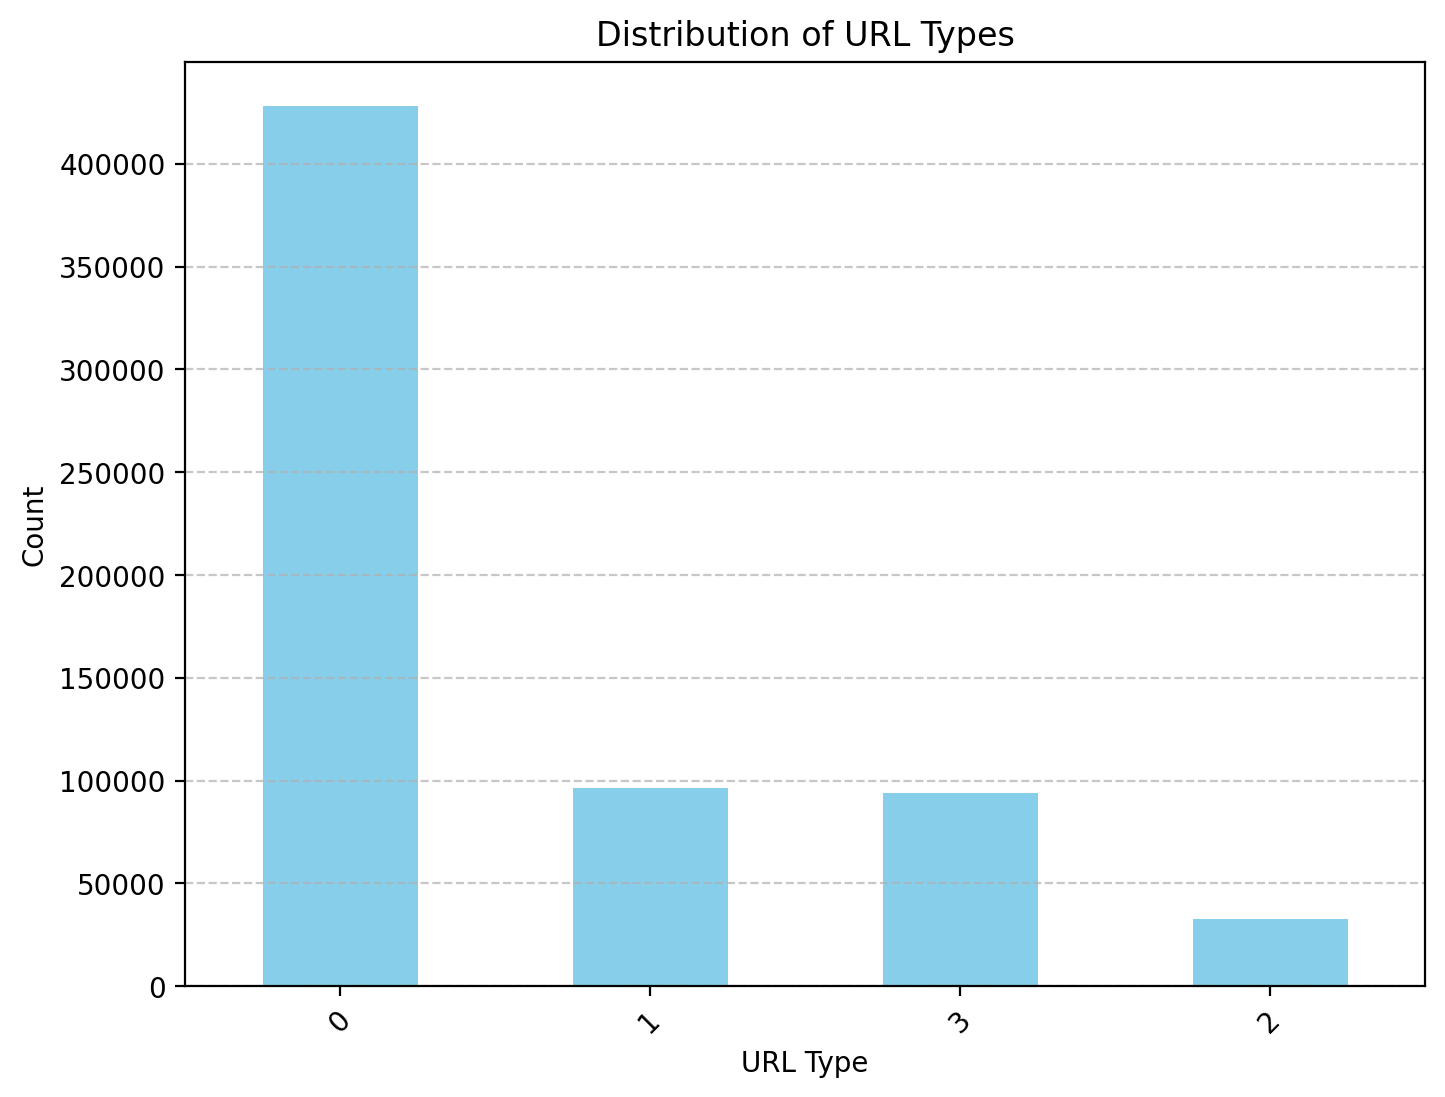

In [14]:
import matplotlib.pyplot as plt

# Plotting the distribution of URL types
plt.figure(figsize=(8, 6))
dataset["class_url"].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of URL Types')
plt.xlabel('URL Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


functions for creating features from URL

In [15]:
def url_length(url):
    return len(str(url))
dataset['url_length'] = dataset['url'].apply(lambda i: url_length(i))

from urllib.parse import urlparse
def hostname_length(url):
    return len(urlparse(url).netloc)
dataset['hostname_length'] = dataset['url'].apply(lambda i: hostname_length(i))

def count_www(url):
    url.count('www')
    return url.count('www')
dataset['count-www'] = dataset['url'].apply(lambda i: count_www(i))

def count_https(url):
    return url.count('https')
dataset['count-https'] = dataset['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')
dataset['count-http'] = dataset['url'].apply(lambda i : count_http(i))


def count_dot(url):
    count_dot = url.count('.')
    return count_dot
dataset['count.'] = dataset['url'].apply(lambda i: count_dot(i))

def count_per(url):
    return url.count('%')
dataset['count%'] = dataset['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')
dataset['count?'] = dataset['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')
dataset['count-'] = dataset['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')
dataset['count='] = dataset['url'].apply(lambda i: count_equal(i))

def count_atrate(url):
    return url.count('@')
dataset['count@'] = dataset['url'].apply(lambda i: count_atrate(i))

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
dataset['count_dir'] = dataset['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
dataset['count_embed_domian'] = dataset['url'].apply(lambda i: no_of_embed(i))
dataset

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,0,1,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,3,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,1,1,4,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,1,1,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,0,0,0,0,3,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,0,2,0,0,4,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,0,0,0,0,4,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,0,0,0,0,2,0


More functions for creating features form URL

In [16]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adataset\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0   
dataset['short_url'] = dataset['url'].apply(lambda i: shortening_service(i))

!pip install tld
from tld import get_tld

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
dataset['fd_length'] = dataset['url'].apply(lambda i: fd_length(i))
#Length of Top Level Domain
dataset['tld'] = dataset['url'].apply(lambda i: get_tld(i,fail_silently=True))

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
dataset['tld_length'] = dataset['tld'].apply(lambda i: tld_length(i))

def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
    
dataset['sus_url'] = dataset['url'].apply(lambda i: suspicious_words(i))

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
dataset['count-digits']= dataset['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
dataset['count-letters']= dataset['url'].apply(lambda i: letter_count(i))

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
dataset['abnormal_url'] = dataset['url'].apply(lambda i: abnormal_url(i))

#Use of IP or not in domain
def having_ip_address(url: str) -> int:
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
dataset['use_of_ip_address'] = dataset['url'].apply(lambda i: having_ip_address(i))
dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 8.5 MB/s eta 0:00:00


,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,0,1,0,0,0,0,0,0,None,-1,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,2,0,0,5,None,-1,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,3,0,0,7,None,-1,0,1,25,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,1,1,4,0,1,0,0,9,be,2,0,7,63,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,1,1,3,0,1,0,0,9,net,3,0,22,199,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,0,0,0,0,3,0,0,7,None,-1,0,12,21,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,0,2,0,0,4,0,1,8,None,-1,0,7,29,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,0,0,0,0,4,0,1,7,None,-1,0,3,33,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,0,0,0,0,2,0,0,4,None,-1,0,0,36,0,0


In [17]:
dataset['use_of_ip_address'].value_counts()

use_of_ip_address
0    643898
1      7293
Name: count, dtype: int64

In [18]:
!pip install googlesearch-python
from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
dataset['google_index'] = dataset['url'].apply(lambda i: google_index(i))
dataset

,url,type,class_url,url_length,hostname_length,count-www,count-https,count-http,count.,count%,count?,count-,count=,count@,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address,google_index
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,0,1,0,0,0,0,0,0,None,-1,0,0,13,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,2,0,0,5,None,-1,0,1,29,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,3,0,0,7,None,-1,0,1,25,0,0,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,1,1,4,0,1,0,0,9,be,2,0,7,63,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,1,1,3,0,1,0,0,9,net,3,0,22,199,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,3,39,0,0,0,0,3,0,0,0,0,0,3,0,0,7,None,-1,0,12,21,0,0,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,3,44,0,0,0,0,2,0,0,2,0,0,4,0,1,8,None,-1,0,7,29,0,0,1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,3,42,0,1,0,0,2,0,0,0,0,0,4,0,1,7,None,-1,0,3,33,0,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,3,45,0,0,0,0,2,0,0,0,0,0,2,0,0,4,None,-1,0,0,36,0,0,1


In [19]:
dataset.isnull().sum()

url                        0
type                       0
class_url                  0
url_length                 0
hostname_length            0
count-www                  0
count-https                0
count-http                 0
count.                     0
count%                     0
count?                     0
count-                     0
count=                     0
count@                     0
count_dir                  0
count_embed_domian         0
short_url                  0
fd_length                  0
tld                   475281
tld_length                 0
sus_url                    0
count-digits               0
count-letters              0
abnormal_url               0
use_of_ip_address          0
google_index               0
dtype: int64

In [20]:
dataset.shape

(651191, 26)

In [21]:
# Import pandas library
import pandas as pd

# Iterate over each column and print the number of unique values
for column in dataset.columns:
    num_unique_values = dataset[column].nunique()
    print("Number of different types of values in column '{}': {}".format(column, num_unique_values))


Number of different types of values in column 'url': 641119
Number of different types of values in column 'type': 4
Number of different types of values in column 'class_url': 4
Number of different types of values in column 'url_length': 549
Number of different types of values in column 'hostname_length': 134
Number of different types of values in column 'count-www': 6
Number of different types of values in column 'count-https': 6
Number of different types of values in column 'count-http': 8
Number of different types of values in column 'count.': 35
Number of different types of values in column 'count%': 124
Number of different types of values in column 'count?': 17
Number of different types of values in column 'count-': 49
Number of different types of values in column 'count=': 30
Number of different types of values in column 'count@': 7
Number of different types of values in column 'count_dir': 31
Number of different types of values in column 'count_embed_domian': 3
Number of differen

Below are the features we are taking to train the ML model in X and y as label

In [22]:
X = dataset[['use_of_ip_address','abnormal_url', 'google_index', 'count-www', 'count@',
           'count_dir', 'count_embed_domian', 'short_url', 'count-https',
           'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
           'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
           'count-letters']]

y = dataset['class_url']

In [23]:
X

,use_of_ip_address,abnormal_url,google_index,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,16,0,0,0,-1,0,13
1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,35,0,0,5,-1,1,29
2,0,0,1,0,0,3,0,0,0,0,0,0,0,0,31,0,0,7,-1,1,25
3,0,1,1,1,0,1,0,0,0,1,0,1,1,4,88,21,0,9,2,7,63
4,0,1,1,0,0,1,0,0,0,1,0,1,1,3,235,23,0,9,3,22,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,0,0,1,0,0,3,0,0,0,0,0,0,0,0,39,0,0,7,-1,12,21
651187,0,0,1,0,0,4,0,1,0,0,0,0,2,0,44,0,0,8,-1,7,29
651188,0,0,1,1,0,4,0,1,0,0,0,0,0,0,42,0,0,7,-1,3,33
651189,0,0,1,0,0,2,0,0,0,0,0,0,0,0,45,0,0,4,-1,0,36


In [24]:
X.fillna(0,inplace=True)


In [25]:
y

0         3
1         0
2         0
3         1
4         1
         ..
651186    3
651187    3
651188    3
651189    3
651190    3
Name: class_url, Length: 651191, dtype: int64

Split the data into train and test for validation

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=5)

In [27]:
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (520952, 21)
Y_train Shape : (520952,)
X_test  Shape : (130239, 21)
Y_test  Shape : (130239,)


LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression(max_iter=1000, random_state=0)
classifier1.fit(X_train.values, y_train.values)
y_pred1 = classifier1.predict(X_test.values)

In [29]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[83011   681   260  1669]
 [  698 18173   176   245]
 [  460  1005  4625   414]
 [ 8769  1709   773  7571]]


KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

classifier2 = KNeighborsClassifier(metric='euclidean')
classifier2.fit(X_train.values, y_train.values)
y_pred2 = classifier2.predict(X_test.values)

In [31]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[84135   100    39  1347]
 [  189 18861    86   156]
 [   98   231  5879   296]
 [ 3498  1077   247 14000]]


GaussianNB

In [32]:
from sklearn.naive_bayes import GaussianNB

classifier3 = GaussianNB()
classifier3.fit(X_train.values, y_train.values)
y_pred3 = classifier3.predict(X_test.values)

In [33]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[76252  5275  1470  2624]
 [    8 19216    50    18]
 [  236  2652  3555    61]
 [ 7729  2908   975  7210]]


DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier 

classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state=22)
classifier4.fit(X_train.values, y_train.values)
y_pred4 = classifier4.predict(X_test.values)

In [35]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

[[83728    28    37  1828]
 [   38 18967    52   235]
 [   34    54  6137   279]
 [ 2610   398   222 15592]]


RandomForestClassifier

In [36]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators=100,max_features='sqrt')
classifier5.fit(X_train.values,y_train.values)
y_pred5 = classifier5.predict(X_test.values)

In [37]:
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[84296     9     9  1307]
 [   25 19135    12   120]
 [   37    63  6116   288]
 [ 2383   358    73 16008]]


XGBClassifier

In [38]:
from xgboost import XGBClassifier

# Assuming X_train and y_train are DataFrame objects
classifier6 = XGBClassifier(random_state=32)
classifier6.fit(X_train.values, y_train.values)
y_pred6 = classifier6.predict(X_test.values)


In [39]:
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)

[[84592    21     9   999]
 [   71 19064    13   144]
 [   64   178  5911   351]
 [ 2823   478   143 15378]]


Performance mertics

In [40]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have imported the classifiers and defined their predictions
classifiers = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6]
model_names = ['LogisticRegression', 'KNeighborsClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier']

# Create a dictionary to map model names to their respective predictions
classifier_map = dict(zip(model_names, classifiers))

# Now you can use this dictionary to iterate over each model name and its predictions
for model_name, y_pred in classifier_map.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1score = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)
    
    print(f"\nMetrics for Model '{model_name}':")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1score}")
    print(f"Classification Report:\n{class_report}")



Metrics for Model 'LogisticRegression':
Accuracy: 0.8705533672709403
Precision: 0.862126548808732
Recall: 0.8705533672709403
F1-score: 0.8566511863808892
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     85621
           1       0.84      0.94      0.89     19292
           2       0.79      0.71      0.75      6504
           3       0.76      0.40      0.53     18822

    accuracy                           0.87    130239
   macro avg       0.82      0.76      0.77    130239
weighted avg       0.86      0.87      0.86    130239


Metrics for Model 'KNeighborsClassifier':
Accuracy: 0.943457796819693
Precision: 0.941980221462466
Recall: 0.943457796819693
F1-score: 0.9416048292281941
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85621
           1       0.93      0.98      0.95     19292
           2       0.94      0.90      0.92   

bar plot of results

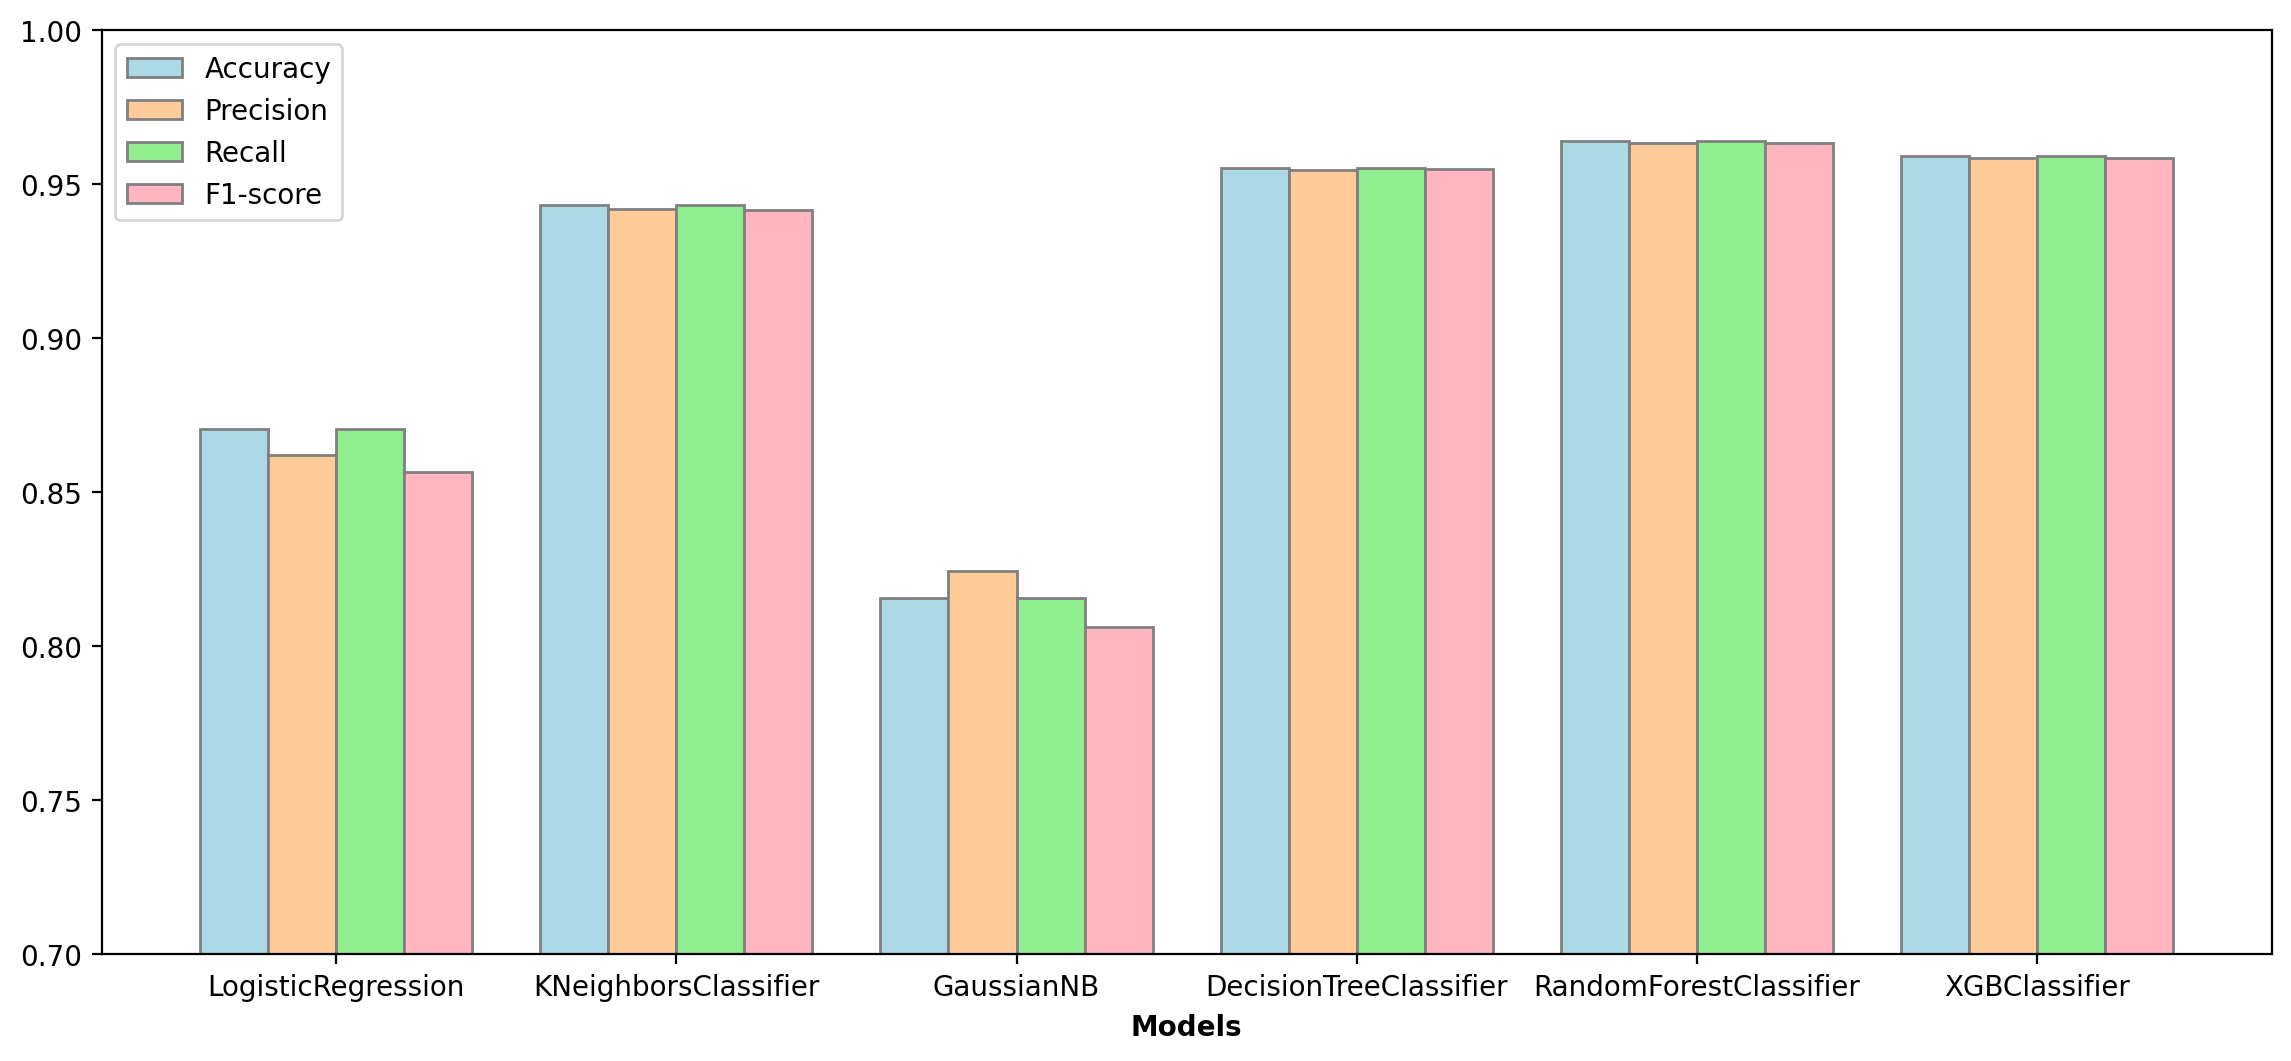

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize data for the bar chart
models = list(classifier_map.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Calculate metric scores for each model
metric_scores = {}
for metric in metrics:
    metric_scores[metric] = [accuracy_score(y_test, classifier_map[model_name]) if metric == 'Accuracy'
                             else precision_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Precision'
                             else recall_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Recall'
                             else f1_score(y_test, classifier_map[model_name], average='weighted') for model_name in models]

# Set width of bars
bar_width = 0.2

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(14, 6))

# Define light colors
colors = ['#add8e6', '#ffcc99', '#90ee90', '#ffb6c1']

# Plotting the bars
plt.bar(r1, metric_scores['Accuracy'], color=colors[0], width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, metric_scores['Precision'], color=colors[1], width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, metric_scores['Recall'], color=colors[2], width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, metric_scores['F1-score'], color=colors[3], width=bar_width, edgecolor='grey', label='F1-score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)

# Set y-axis limits
plt.ylim(0.7, 1.0)

# Add a legend and show the plot
plt.legend()
plt.show()


line plot of results

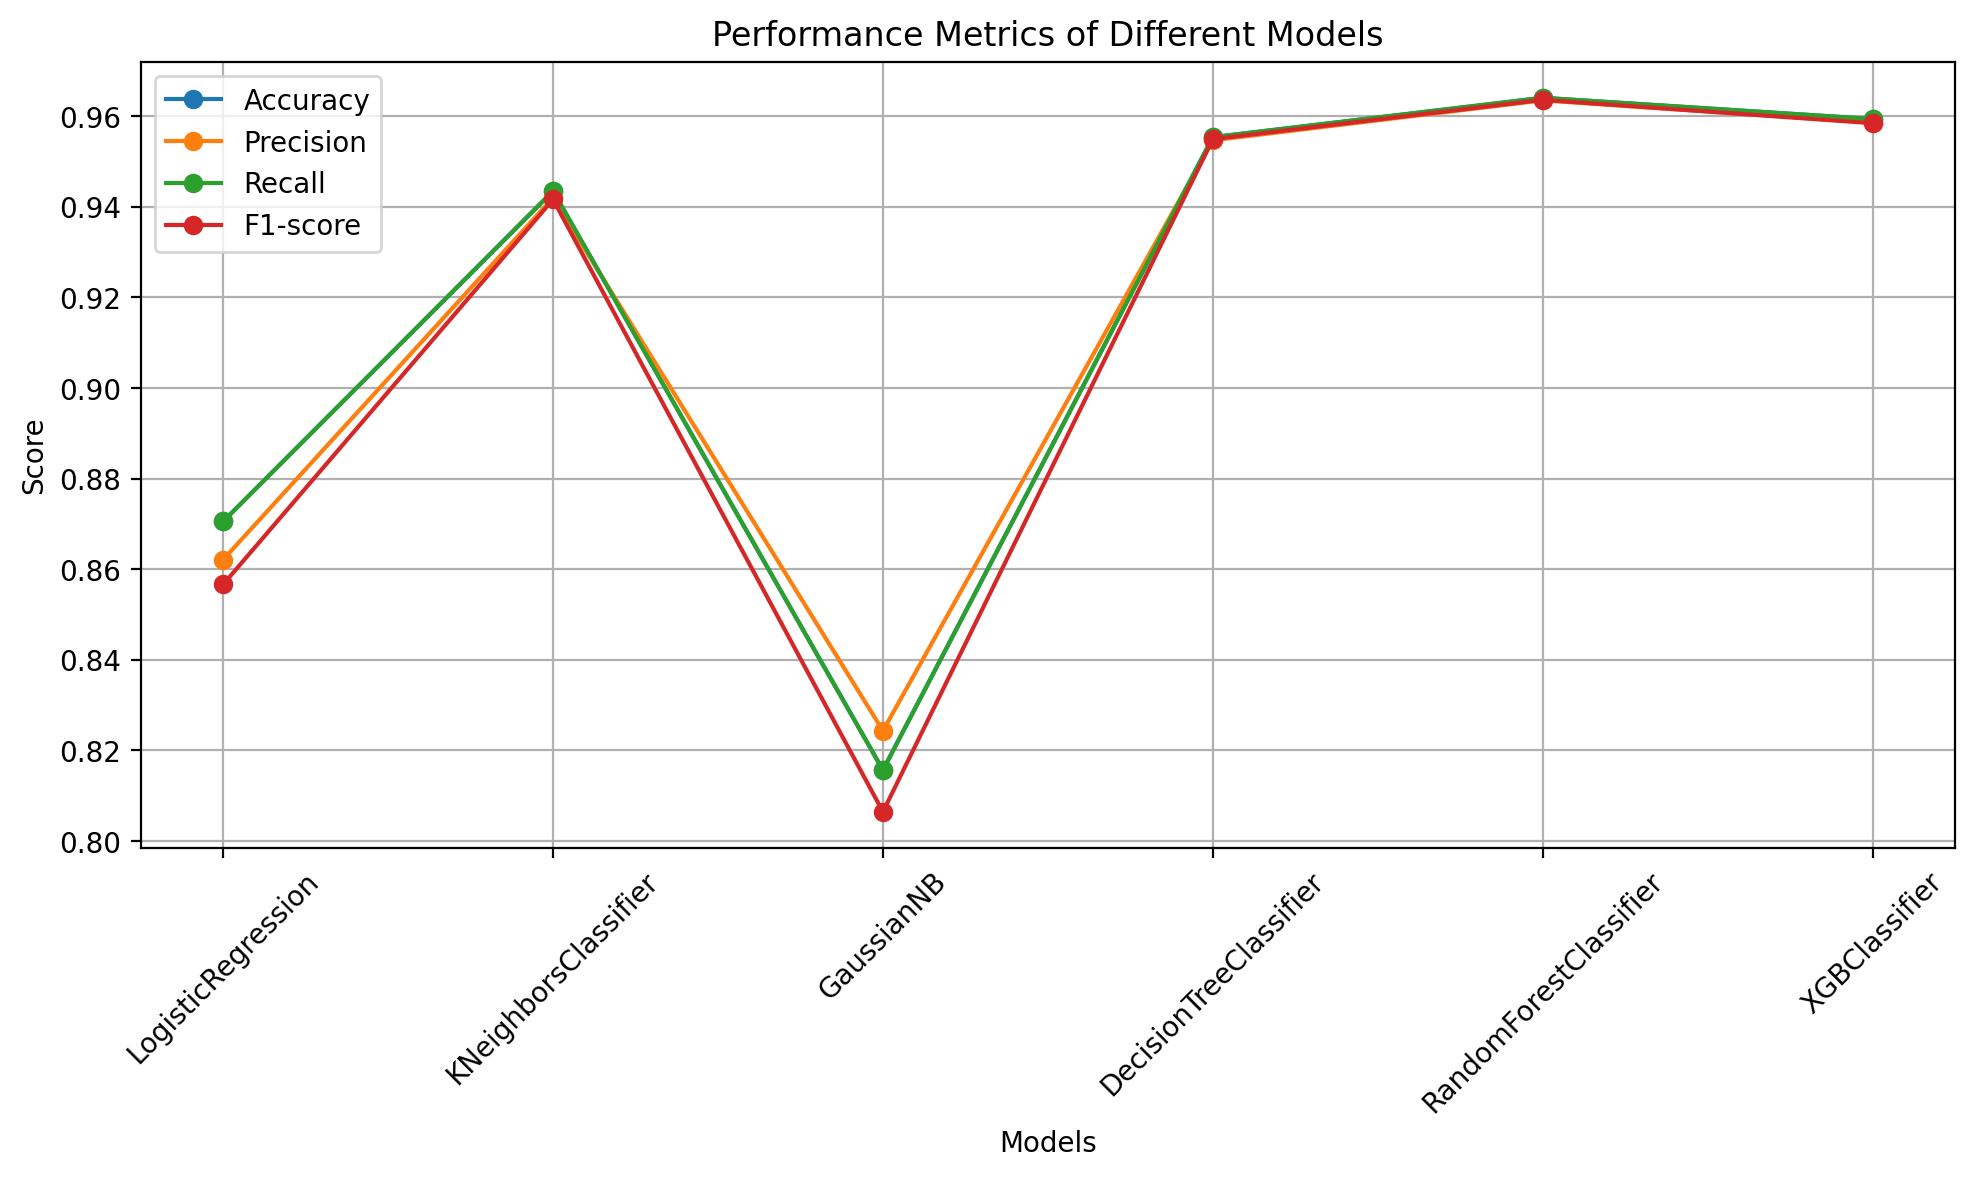

In [42]:
import matplotlib.pyplot as plt

# Initialize data for the line plot
models = list(classifier_map.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Calculate metric scores for each model
metric_scores = {}
for metric in metrics:
    metric_scores[metric] = [accuracy_score(y_test, classifier_map[model_name]) if metric == 'Accuracy'
                             else precision_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Precision'
                             else recall_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Recall'
                             else f1_score(y_test, classifier_map[model_name], average='weighted') for model_name in models]

# Plotting the line plot
plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.plot(models, metric_scores[metric], marker='o', label=metric)

plt.title('Performance Metrics of Different Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Below is the code to validate some known URLs using the derived models. When given an input, below cell creates features required for models as input

In [43]:
def get_url(url):
    
    status = []
    
    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))

    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
      
    status.append(tld_length(tld))

    return status

In [44]:
def model_predict1(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier1.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res
    
    elif int(pred[0]) == 1:
        res="Defacement"
        return res
    
    elif int(pred[0]) == 2:
        res="Phising"
        return res
        
    elif int(pred[0]) == 3:
        res="Malware"
        return res

def model_predict2(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier2.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res
    
    elif int(pred[0]) == 1:
        res="Defacement"
        return res
    
    elif int(pred[0]) == 2:
        res="Phising"
        return res
        
    elif int(pred[0]) == 3:
        res="Malware"
        return res
def model_predict3(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier3.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res
    
    elif int(pred[0]) == 1:
        res="Defacement"
        return res
    
    elif int(pred[0]) == 2:
        res="Phising"
        return res
        
    elif int(pred[0]) == 3:
        res="Malware"
        return res

def model_predict4(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier4.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res
    
    elif int(pred[0]) == 1:
        res="Defacement"
        return res
    
    elif int(pred[0]) == 2:
        res="Phising"
        return res
        
    elif int(pred[0]) == 3:
        res="Malware"
        return res

def model_predict5(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier5.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res
    
    elif int(pred[0]) == 1:
        res="Defacement"
        return res
    
    elif int(pred[0]) == 2:
        res="Phising"
        return res
        
    elif int(pred[0]) == 3:
        res="Malware"
        return res

def model_predict6(test_url):
    features_test = get_url(test_url)
    features_test = np.array(features_test).reshape((1, -1))

    pred = classifier6.predict(features_test)
    if int(pred[0]) == 0:
        res="Bening"
        return res
    
    elif int(pred[0]) == 1:
        res="Defacement"
        return res
    
    elif int(pred[0]) == 2:
        res="Phising"
        return res
        
    elif int(pred[0]) == 3:
        res="Malware"
        return res

In [45]:
urls = ['www.kaggle.com',
        'en.wikipedia.org/wiki/Main_Page',  
        'http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15',
        'bopsecrets.org/rexroth/cr/1.htm',
       'www.stackoverflow.com/questions/',
       'www.google.com/',
       'https://www.atlassian.com/software/confluence/templates/product-requirements']
print("----------------------------------------------")
print("LogisticRegression :")
for url in urls:
     print(model_predict1(url))
        
print("----------------------------------------------")
print("KNeighborsClassifier :")
for url in urls:
     print(model_predict2(url))
        
print("----------------------------------------------")
print("GaussianNB :")
for url in urls:
     print(model_predict3(url))
        
print("----------------------------------------------")
print("DecisionTreeClassifier :")
for url in urls:
     print(model_predict4(url))
        
print("----------------------------------------------")
print("RandomForest :")
for url in urls:
     print(model_predict5(url))
        
print("----------------------------------------------")
print("XGBClassifier :")
for url in urls:
     print(model_predict6(url))

----------------------------------------------
LogisticRegression :
Malware
Bening
Malware
Bening
Malware
Malware
Malware
----------------------------------------------
KNeighborsClassifier :
Malware
Malware
Malware
Malware
Malware
Malware
Malware
----------------------------------------------
GaussianNB :
Malware
Malware
Phising
Malware
Malware
Malware
Malware
----------------------------------------------
DecisionTreeClassifier :
Bening
Malware
Phising
Bening
Bening
Bening
Phising
----------------------------------------------
RandomForest :
Bening
Bening
Defacement
Bening
Bening
Bening
Malware
----------------------------------------------
XGBClassifier :
Bening
Bening
Phising
Malware
Bening
Bening
Malware


Below code is to save models

In [46]:
from joblib import dump

#dump(classifier1, 'LogisticRegression.joblib')
#dump(classifier2, 'KNeighborsClassifier.joblib')
#dump(classifier3, 'GaussianNB.joblib')
#dump(classifier4, 'DecisionTreeClassifier.joblib')
#dump(classifier5, 'RandomForestClassifier.joblib')

## Using BERT

Import libraries

In [47]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [48]:
#here we are using only 50000 rows for faster generation of model and we need a lot of processing power for all the data
df = pd.read_csv("/kaggle/input/malicious-urls-dataset/malicious_phish.csv",nrows=50000)

Data Preprocessing and creating labels

In [49]:
lb_make = LabelEncoder()
df["label"] = lb_make.fit_transform(df["type"])

Bert tokenizer and a bert model to generate embeddings

In [50]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

url_embeddings = []
for url in df['url']:
    tokens = tokenizer.encode(url, add_special_tokens=True, max_length=512, truncation=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(tokens)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    url_embeddings.append(embeddings)

url_embeddings = torch.tensor(url_embeddings)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Along with embeddings, we add the url features for more understanding of semantics along wityh url features

In [51]:
def url_length(url):
    return len(str(url))

from urllib.parse import urlparse

def hostname_length(url):
    return len(urlparse(url).netloc)

def count_www(url):
    url.count('www')
    return url.count('www')

def count_https(url):
    return url.count('https')

def count_http(url):
    return url.count('http')

def count_dot(url):
    count_dot = url.count('.')
    return count_dot

def count_per(url):
    return url.count('%')

def count_ques(url):
    return url.count('?')

def count_hyphen(url):
    return url.count('-')

def count_equal(url):
    return url.count('=')

def count_atrate(url):
    return url.count('@')

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
import re
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adataset\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
!pip install tld 
from tld import get_tld

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
    
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
    
def having_ip_address(url: str) -> int:
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
    
!pip install googlesearch-python
from googlesearch import search
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0

Applying the above functions on the dataframe to create new columns

In [52]:
df['url_len'] = df['url'].apply(lambda i: url_length(i))
df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))
df['count_www'] = df['url'].apply(lambda i: count_www(i))
df['count_https'] = df['url'].apply(lambda i: count_https(i))
df['count_http'] = df['url'].apply(lambda i: count_http(i))

df['count.'] = df['url'].apply(lambda i: count_dot(i))
df['count%'] = df['url'].apply(lambda i: count_per(i))
df['count?'] = df['url'].apply(lambda i: count_ques(i))
df['count_'] = df['url'].apply(lambda i: count_hyphen(i))
df['count='] = df['url'].apply(lambda i: count_equal(i))
df['count@'] = df['url'].apply(lambda i: count_atrate(i))
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))

df['short_url'] = df['url'].apply(lambda i: shortening_service(i))
df['fd_length'] = df['url'].apply(lambda i: fd_length(i))
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

df['count-digits']= df['url'].apply(lambda i: digit_count(i))
df['count-letters']= df['url'].apply(lambda i: letter_count(i))
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))
df['use_of_ip_address'] = df['url'].apply(lambda i: having_ip_address(i))
df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [53]:
df

,url,type,label,url_len,hostname_length,count_www,count_https,count_http,count.,count%,count?,count_,count=,count@,count_dir,count_embed_domian,short_url,fd_length,tld,tld_length,sus_url,count-digits,count-letters,abnormal_url,use_of_ip_address,google_index
0,br-icloud.com.br,phishing,3,16,0,0,0,0,2,0,0,1,0,0,0,0,0,0,None,-1,0,0,13,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,0,0,0,0,2,0,0,5,None,-1,0,1,29,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,0,0,0,0,3,0,0,7,None,-1,0,1,25,0,0,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,88,21,1,0,1,3,0,1,1,4,0,1,0,0,9,be,2,0,7,63,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,23,0,0,1,2,0,1,1,3,0,1,0,0,9,net,3,0,22,199,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,facebook.com/people/Alexander-Caldwell/1542866551,benign,0,49,0,0,0,0,1,0,0,1,0,0,3,0,0,6,None,-1,0,10,34,0,0,1
49996,schools.publicschoolsreport.com/district/PA/Al...,benign,0,81,0,0,0,0,3,0,0,0,0,0,3,0,1,8,None,-1,0,0,75,0,0,1
49997,ffbsccn.wordpress.com/2011/05/07/onward-a-book...,benign,0,68,0,0,0,0,2,0,0,6,0,0,5,0,0,4,None,-1,0,8,47,0,0,1
49998,myspace.com/keithsykes,benign,0,22,0,0,0,0,1,0,0,0,0,0,1,0,0,10,None,-1,0,0,20,0,0,1


In [54]:
df['type'].value_counts()

type
benign        36678
defacement     9191
phishing       2937
malware        1194
Name: count, dtype: int64

In [55]:
df['label'].value_counts()

label
0    36678
1     9191
3     2937
2     1194
Name: count, dtype: int64

In [56]:
other_numeric_data = df.drop(columns=['url','tld','type','label'])
other_numeric_data_tensor = torch.tensor(other_numeric_data.values)

In [57]:
concatenated_features = torch.cat((url_embeddings, other_numeric_data_tensor), dim=1)

In [58]:
concatenated_features.shape

torch.Size([50000, 790])

split the data into test and train

In [59]:
X_train, X_test, y_train, y_test = train_test_split(concatenated_features, df['label'],stratify = df['label'], shuffle=True, test_size=0.2, random_state=32)

In [60]:
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : torch.Size([40000, 790])
Y_train Shape : (40000,)
X_test  Shape : torch.Size([10000, 790])
Y_test  Shape : (10000,)


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Below are the set of models we are going to train our data

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from joblib import dump

In [63]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dt_classifier.fit(X_train, y_train)
y_pred_train_dt = dt_classifier.predict(X_train)
y_pred_test_dt = dt_classifier.predict(X_test)

train_accuracy_dt = accuracy_score(y_train, y_pred_train_dt)
test_accuracy_dt = accuracy_score(y_test, y_pred_test_dt)

print("Decision Tree Classifier:")
print("Training Accuracy:", train_accuracy_dt)
print("Testing Accuracy:", test_accuracy_dt)

# Save the model
#dump(rf_classifier, 'DecisionTreeClassifier.joblib')

Decision Tree Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.9738


In [64]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=32)
rf_classifier.fit(X_train, y_train)
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

print("Random Forest Classifier:")
print("Training Accuracy:", train_accuracy_rf)
print("Testing Accuracy:", test_accuracy_rf)

# Save the model
#dump(rf_classifier, 'RandomForestClassifier.joblib')

Random Forest Classifier:
Training Accuracy: 0.999975
Testing Accuracy: 0.9832


In [65]:
# Gaussian Naive Bayes
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred_train_gnb = gnb_classifier.predict(X_train)
y_pred_test_gnb = gnb_classifier.predict(X_test)

train_accuracy_gnb = accuracy_score(y_train, y_pred_train_gnb)
test_accuracy_gnb = accuracy_score(y_test, y_pred_test_gnb)

print("\nGaussian Naive Bayes:")
print("Training Accuracy:", train_accuracy_gnb)
print("Testing Accuracy:", test_accuracy_gnb)

# Save the model
#dump(gnb_classifier, 'GaussianNB.joblib')


Gaussian Naive Bayes:
Training Accuracy: 0.819425
Testing Accuracy: 0.8306


In [66]:
# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_train_knn = knn_classifier.predict(X_train)
y_pred_test_knn = knn_classifier.predict(X_test)

train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)

print("\nK-Nearest Neighbors:")
print("Training Accuracy:", train_accuracy_knn)
print("Testing Accuracy:", test_accuracy_knn)

# Save the model
#dump(knn_classifier, 'KNeighborsClassifier.joblib')


K-Nearest Neighbors:
Training Accuracy: 0.978375
Testing Accuracy: 0.9723


In [67]:
# Support Vector Machine
svm_classifier = SVC(kernel='linear', random_state=32)
svm_classifier.fit(X_train, y_train)
y_pred_train_svm = svm_classifier.predict(X_train)
y_pred_test_svm = svm_classifier.predict(X_test)

train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

print("\nSupport Vector Machine:")
print("Training Accuracy:", train_accuracy_svm)
print("Testing Accuracy:", test_accuracy_svm)

# Save the model
#dump(svm_classifier, 'SVM.joblib')


Support Vector Machine:
Training Accuracy: 0.99745
Testing Accuracy: 0.989


In [68]:
# XGBoost
xgb_classifier = XGBClassifier(random_state=32)
xgb_classifier.fit(X_train, y_train)
y_pred_train_xgb = xgb_classifier.predict(X_train)
y_pred_test_xgb = xgb_classifier.predict(X_test)

train_accuracy_xgb = accuracy_score(y_train, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)

print("\nXGBoost:")
print("Training Accuracy:", train_accuracy_xgb)
print("Testing Accuracy:", test_accuracy_xgb)

# Save the model
#dump(xgb_classifier, 'XGBClassifier.joblib')


XGBoost:
Training Accuracy: 1.0
Testing Accuracy: 0.9909


In [69]:
# Logistic Regression
logistic_classifier = LogisticRegression(random_state=32)
logistic_classifier.fit(X_train, y_train)
y_pred_train_logistic = logistic_classifier.predict(X_train)
y_pred_test_logistic = logistic_classifier.predict(X_test)

train_accuracy_logistic = accuracy_score(y_train, y_pred_train_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_pred_test_logistic)

print("\nLogistic Regression:")
print("Training Accuracy:", train_accuracy_logistic)
print("Testing Accuracy:", test_accuracy_logistic)

# Save the model
#dump(logistic_classifier, 'LogisticRegression.joblib')


Logistic Regression:
Training Accuracy: 0.954225
Testing Accuracy: 0.9583


Performance mertics

In [70]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have imported the classifiers and defined their predictions
classifiers = [y_pred_test_logistic, y_pred_test_knn, y_pred_test_gnb, y_pred_test_dt, y_pred_test_rf, y_pred_test_xgb, y_pred_test_svm]
model_names = ['LogisticRegression', 'KNeighborsClassifier', 'GaussianNB', 'DecisionTree', 'RandomForest', 'XGBClassifier', 'Support Vector Machine']

# Create a dictionary to map model names to their respective predictions
classifier_map = dict(zip(model_names, classifiers))

# Now you can use this dictionary to iterate over each model name and its predictions
for model_name, y_pred in classifier_map.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1score = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)
    
    print(f"\nMetrics for Model '{model_name}':")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1score}")
    print(f"Classification Report:\n{class_report}")



Metrics for Model 'LogisticRegression':
Accuracy: 0.9583
Precision: 0.9568653417700245
Recall: 0.9583
F1-score: 0.9572142978662783
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7336
           1       0.91      0.95      0.93      1838
           2       0.71      0.56      0.63       239
           3       0.86      0.78      0.82       587

    accuracy                           0.96     10000
   macro avg       0.87      0.82      0.84     10000
weighted avg       0.96      0.96      0.96     10000


Metrics for Model 'KNeighborsClassifier':
Accuracy: 0.9723
Precision: 0.9718001804128473
Recall: 0.9723
F1-score: 0.9713722908776117
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7336
           1       0.94      0.98      0.96      1838
           2       0.87      0.77      0.82       239
           3       0.94      0.76   

bar plot of the results

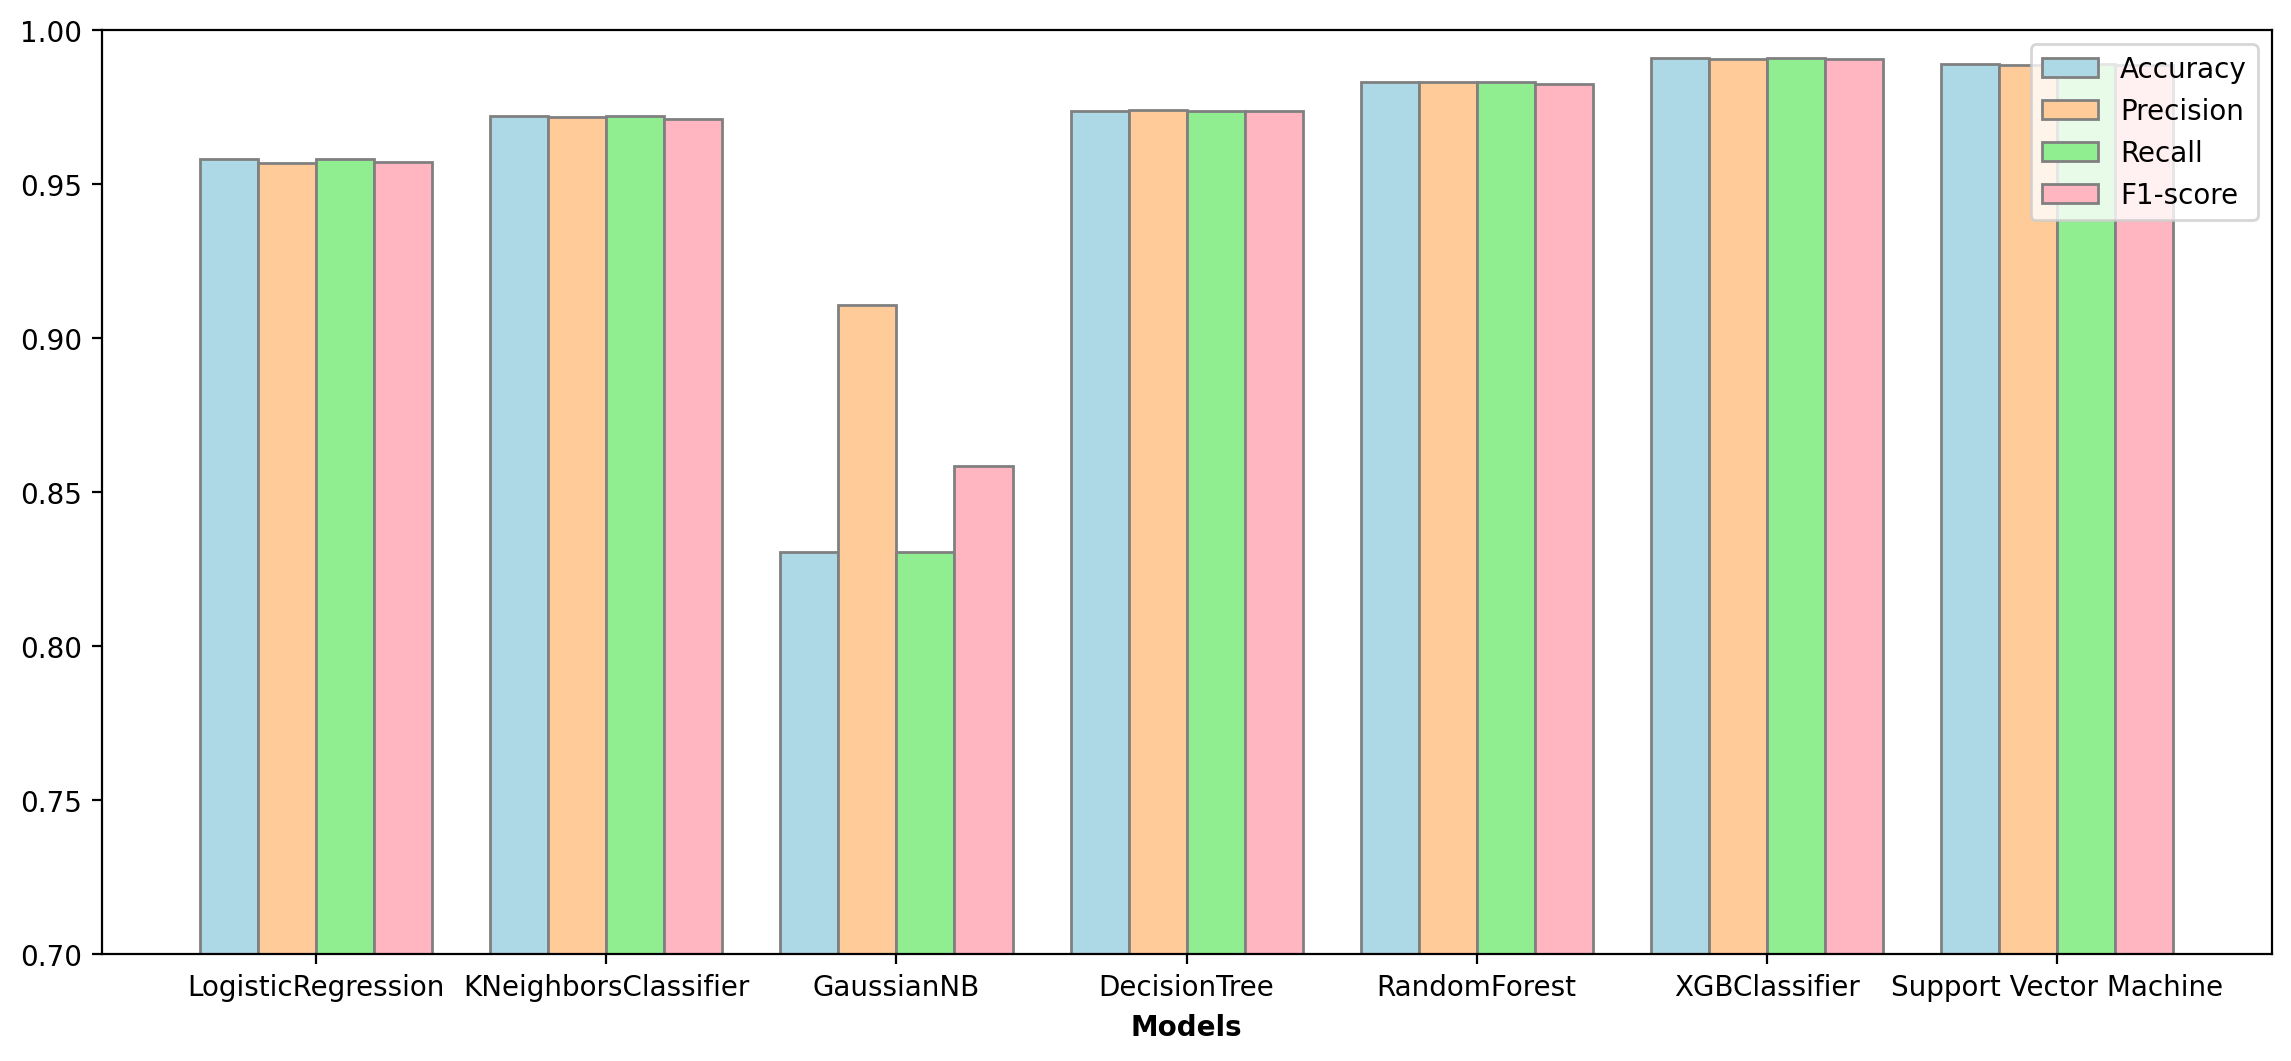

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize data for the bar chart
models = list(classifier_map.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Calculate metric scores for each model
metric_scores = {}
for metric in metrics:
    metric_scores[metric] = [accuracy_score(y_test, classifier_map[model_name]) if metric == 'Accuracy'
                             else precision_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Precision'
                             else recall_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Recall'
                             else f1_score(y_test, classifier_map[model_name], average='weighted') for model_name in models]

# Set width of bars
bar_width = 0.2

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(14, 6))

# Define light colors
colors = ['#add8e6', '#ffcc99', '#90ee90', '#ffb6c1']

# Plotting the bars
plt.bar(r1, metric_scores['Accuracy'], color=colors[0], width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, metric_scores['Precision'], color=colors[1], width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, metric_scores['Recall'], color=colors[2], width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, metric_scores['F1-score'], color=colors[3], width=bar_width, edgecolor='grey', label='F1-score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)

# Set y-axis limits
plt.ylim(0.7, 1.0)

# Add a legend and show the plot
plt.legend()
plt.show()


line plot of the results

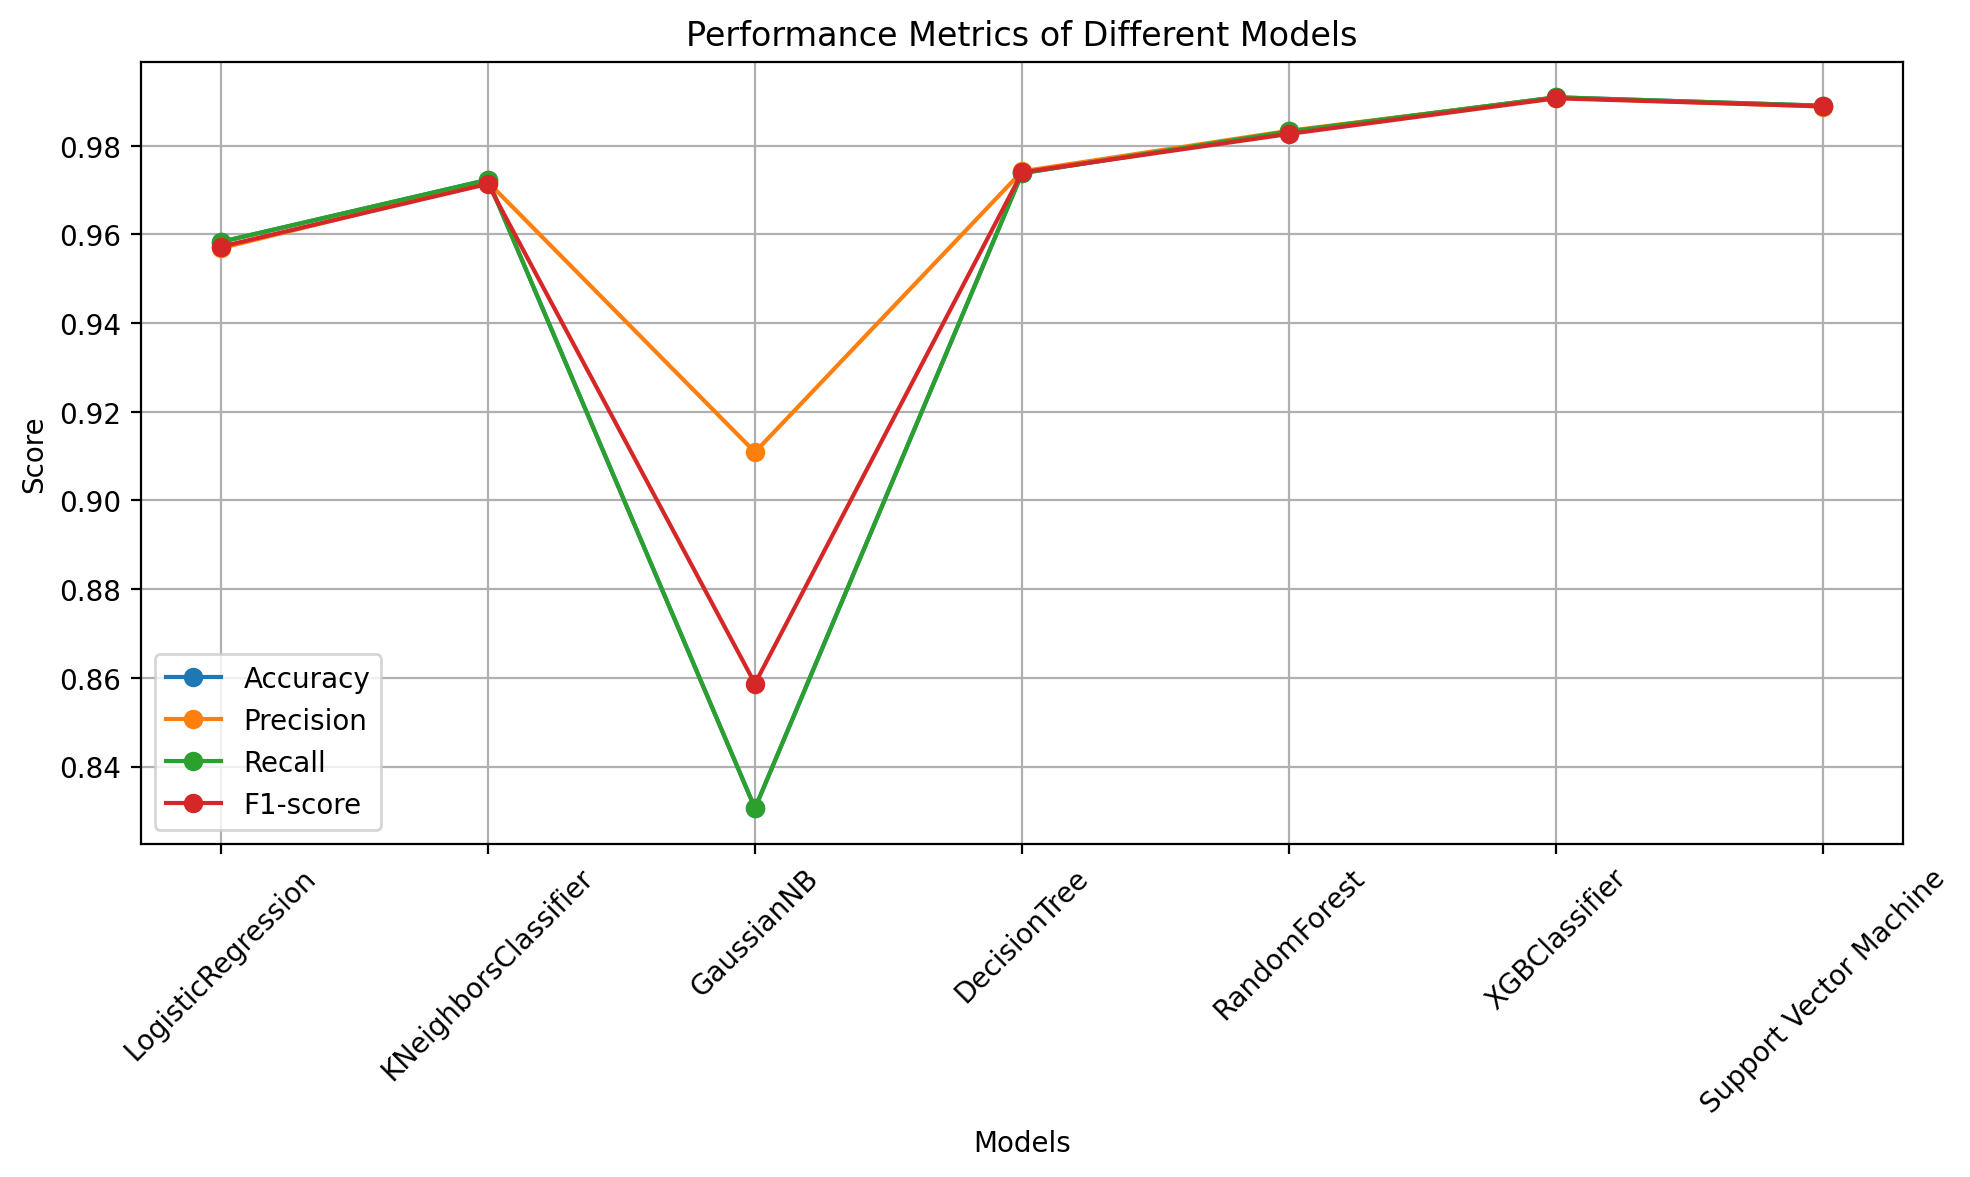

In [72]:
import matplotlib.pyplot as plt

# Initialize data for the line plot
models = list(classifier_map.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Calculate metric scores for each model
metric_scores = {}
for metric in metrics:
    metric_scores[metric] = [accuracy_score(y_test, classifier_map[model_name]) if metric == 'Accuracy'
                             else precision_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Precision'
                             else recall_score(y_test, classifier_map[model_name], average='weighted') if metric == 'Recall'
                             else f1_score(y_test, classifier_map[model_name], average='weighted') for model_name in models]

# Plotting the line plot
plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.plot(models, metric_scores[metric], marker='o', label=metric)

plt.title('Performance Metrics of Different Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:
# Assuming new_urls is a list of new URLs to classify
new_urls = ["https://www.mcafee.com/","thetakeaway.org/people/victor-begg/","https://leetcode.com/","http://example.com", "https://google.com", "http://malicious-site.com", "https://legitimate-site.com", "https://phishing-site.org"]

# Initialize list to store embeddings for new URLs
new_url_embeddings = []

# Generate embeddings for new URLs
for url in new_urls:
    tokens = tokenizer.encode(url, add_special_tokens=True, max_length=512, truncation=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(tokens)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    new_url_embeddings.append(embeddings)

# Convert embeddings to torch tensor
new_url_embeddings_tensor = torch.tensor(new_url_embeddings)

# Extract numerical features for new URLs
new_other_numeric_data = pd.DataFrame({
    'url_len': [url_length(url) for url in new_urls],
    'hostname_length': [hostname_length(url) for url in new_urls],
    'count_www': [count_www(url) for url in new_urls],
    'count_https': [count_https(url) for url in new_urls],
    'count_http': [count_http(url) for url in new_urls],
    'count.': [count_dot(url) for url in new_urls],
    'count%': [count_per(url) for url in new_urls],
    'count?': [count_ques(url) for url in new_urls],
    'count_': [count_hyphen(url) for url in new_urls],
    'count=': [count_equal(url) for url in new_urls],
    'count@': [count_atrate(url) for url in new_urls],
    'count_dir': [no_of_dir(url) for url in new_urls],
    'count_embed_domian': [no_of_embed(url) for url in new_urls],
    'short_url': [shortening_service(url) for url in new_urls],
    'fd_length': [fd_length(url) for url in new_urls],
    'tld_length': [tld_length(get_tld(url,fail_silently=True)) for url in new_urls],
    'sus_url': [suspicious_words(url) for url in new_urls],
    'count-digits': [digit_count(url) for url in new_urls],
    'count-letters': [letter_count(url) for url in new_urls],
    'abnormal_url': [abnormal_url(url) for url in new_urls],
    'use_of_ip_address': [having_ip_address(url) for url in new_urls],
    'google_index': [google_index(url) for url in new_urls]
})

# Convert numerical features to torch tensor
new_other_numeric_data_tensor = torch.tensor(new_other_numeric_data.values)

# Concatenate URL embeddings and numerical features
new_concatenated_features = torch.cat((new_url_embeddings_tensor, new_other_numeric_data_tensor), dim=1)

# Make predictions using the trained Random Forest classifier
predictions = rf_classifier.predict(new_concatenated_features)

# Print predictions for new URLs
for url, prediction in zip(new_urls, predictions):
    print("URL:", url)
    print("Prediction:", lb_make.inverse_transform([prediction])[0])  # Convert label back to original class


URL: https://www.mcafee.com/
Prediction: defacement
URL: thetakeaway.org/people/victor-begg/
Prediction: benign
URL: https://leetcode.com/
Prediction: defacement
URL: http://example.com
Prediction: defacement
URL: https://google.com
Prediction: defacement
URL: http://malicious-site.com
Prediction: defacement
URL: https://legitimate-site.com
Prediction: defacement
URL: https://phishing-site.org
Prediction: defacement
